# BIOINF 305. Assignment - week 43.
## Assem Maratova

In [1]:
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
plt.rcParams['figure.figsize'] = 10 , 5  # default figure size
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title 

### Task 1 - The Belousov-Zhabotinski reaction

\begin{align}
A + B \qquad &\xrightarrow{\quad k_1 \quad} \qquad C \\
C + B \qquad  &\xrightarrow{\quad k_2 \quad} \qquad D \\
A + C \qquad  &\xrightarrow{\quad k_3 \quad} \qquad 2C + E \\
2C \qquad &\xrightarrow{\quad k_4 \quad} \qquad D \\
E \qquad  &\xrightarrow{\quad k_5 \quad} \qquad B
\end{align}

\begin{equation}
\text{rate_vector} = 
\begin{pmatrix}
k_1 A B\\
k_2 C B\\
k_3 A C\\
k_4 C^2\\
k_5 E
\end{pmatrix}, \qquad
\text{stochiometric_matrix} = 
\begin{pmatrix}
-1 & 0 & -1 & 0 & 0 \\
-1 & -1 & 0 & 0 & 1 \\
1 & -1 & 1 & -2 & 0 \\
0 & 1 & 0 & 1 & 0  \\
0 & 0 & 1 & 0 & -1
\end{pmatrix}.
\end{equation}

\begin{equation}
\begin{pmatrix}
A'\\
B'\\
C'\\
D'\\
E'
\end{pmatrix}=
\begin{pmatrix}
-1 & 0 & -1 & 0 & 0 \\
-1 & -1 & 0 & 0 & 1 \\
1 & -1 & 1 & -2 & 0 \\
0 & 1 & 0 & 1 & 0  \\
0 & 0 & 1 & 0 & -1
\end{pmatrix}\ast
\begin{pmatrix}
k_1 A B\\
k_2 C B\\
k_3 A C\\
k_4 C^2\\
k_5 E
\end{pmatrix}=
\begin{pmatrix}
-k_1 A B -k_3 A C\\
-k_1 A B -k_2 C B +k_5 E\\
k_1 A B -k_2 C B +k_3 A C -2k_4 C^2\\
k_2 C B + k_4 C^2\\
k_3 A C - k_5 E
\end{pmatrix}.
\end{equation}

In [3]:
# initial values of concentrations of chemical species involved in the reactions 
c = np.array([0.6e-1, 0.33e-6, 0.501e-10, 0.3e-1, 0.24e-7]) 

def B_Zh_reaction(y,t):
    # reaction rate constants
    k = np.array([1.34, 1.6e9, 8.0e3, 4.0e7, 1.0]) 
    stochiometric = np.array([
              [-1,0,-1,0,0], 
              [-1,-1,0,0,1],
              [1,-1,1,-2,0],
              [0,1,0,1,0],
              [0,0,1,0,-1]])
    
    rate_vector = np.array(list([k[0]*y[0]*y[1], 
                           k[1]*y[1]*y[2],
                           k[2]*y[0]*y[2],
                           k[3]*y[2]*y[2],k[4]*y[4]]))
    [dAdt,dBdt,dCdt,dDdt,dEdt] = stochiometric.dot(rate_vector)
    return [dAdt,dBdt,dCdt,dDdt,dEdt]

In [4]:
time = np.linspace(0,200,800)
y = odeint(B_Zh_reaction,c,time, rtol=1e-8, atol=1e-10)
log_y = np.log(y) 

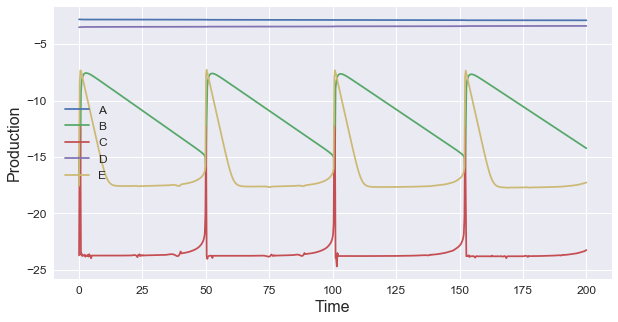

In [5]:
plt.plot(time,log_y[:,0],label='A')
plt.plot(time,log_y[:,1],label='B')
plt.plot(time,log_y[:,2],label='C')
plt.plot(time,log_y[:,3],label='D')
plt.plot(time,log_y[:,4],label='E')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Production')
plt.show()

### Task 2 Quasi steady state assumption

\begin{equation}
\text{rate_vector} = 
\begin{pmatrix}
k_1 A\\
k_2 B\\
k_{-1} B\\
k_{-2} C
\end{pmatrix}, \qquad
\text{stochiometric_matrix} = 
\begin{pmatrix}
-1 & 1 & 0 & 0 \\
1 & -1 & -1 & 1 \\
0 & 0 & 1 & -1 
\end{pmatrix}.
\end{equation}

\begin{equation}
\begin{pmatrix}
A'\\
B'\\
C'\\
\end{pmatrix}=
\begin{pmatrix}
-1 & 1 & 0 & 0 \\
1 & -1 & -1 & 1 \\
0 & 0 & 1 & -1 
\end{pmatrix}\ast
\begin{pmatrix}
k_1 A\\
k_2 B\\
k_{-1} B\\
k_{-2} C
\end{pmatrix}=
\begin{pmatrix}
-k_1 A + k_2 B\\
k_1 A - k_2 B + k_{-1} B + K_{-2}C\\
k_{-1} B - K_{-2}C
\end{pmatrix}.
\end{equation}

In [7]:
# initial values of concentrations of chemical species involved in the reactions 
c0 = np.array([1.5, 3.0, 2.0])

def ABC_rates(y,t):
    k = np.array([0.05, 0.7, 0.005, 0.4]) 
    
    stochiometric = np.array([
              [-1,1,0,0], 
              [1,-1,-1,1],
              [0,0,1,-1]])
    
    rate_vector = np.array(list([k[0]*y[0], 
                           k[1]*y[1],
                           k[2]*y[1],
                           k[3]*y[2]]))
    [dAdt,dBdt,dCdt] = stochiometric.dot(rate_vector)
    return [dAdt,dBdt,dCdt]

time = np.linspace(0,20,100)
Y = odeint(ABC_rates,c0,time,rtol=1e-8,atol=1e-10)

In [8]:
# initial values for reduced system
c0 = np.array([1.5, 2.0]) 

def AC_rates(y,t):
    k = np.array([0.05, 0.7, 0.005, 0.4])
    
    val = ((k[0]*y[0])+(k[3]*y[1]))/(k[1]+k[2])
    [dAdt, dCdt] = [-(k[0]*y[0]) + k[1]*val, k[2]*val - (k[3]*y[1])]
    return [dAdt,dCdt]

time1 = np.linspace(0,20,50)
Y1 = odeint(AC_rates,c0,time1,rtol=1e-8,atol=1e-10)

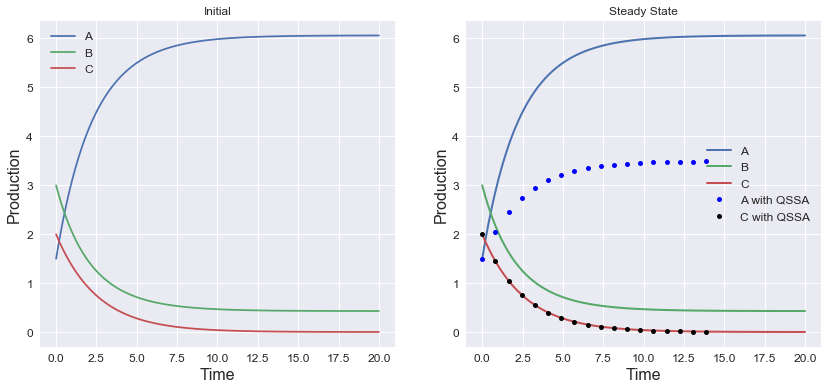

In [9]:
fig, ax = plt.subplots(1,2,figsize=(14, 6))
ax[0].plot(time,Y[:,0],label='A')
ax[0].plot(time,Y[:,1],label='B')
ax[0].plot(time,Y[:,2],label='C')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Production')
ax[0].set_title('Initial')
ax[0].legend()

ax[1].plot(time,Y[:,0],label='A', lw=2)
ax[1].plot(time,Y[:,1],label='B', lw=2)
ax[1].plot(time,Y[:,2],label='C', lw=2)
ax[1].plot(time1[0:36:2],Y1[0:36:2,0],'bo',label='A with QSSA', ms=5)
ax[1].plot(time1[0:36:2],Y1[0:36:2,1],'ko',label='C with QSSA', ms=5)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Production')
ax[1].set_title('Steady State')
ax[1].legend()

plt.show()

In [10]:
F_A= interpolate.interp1d(time1,Y1[:,0])
F_C= interpolate.interp1d(time1,Y1[:,1])
A_QSSA = F_A(time)
C_QSSA = F_C(time)

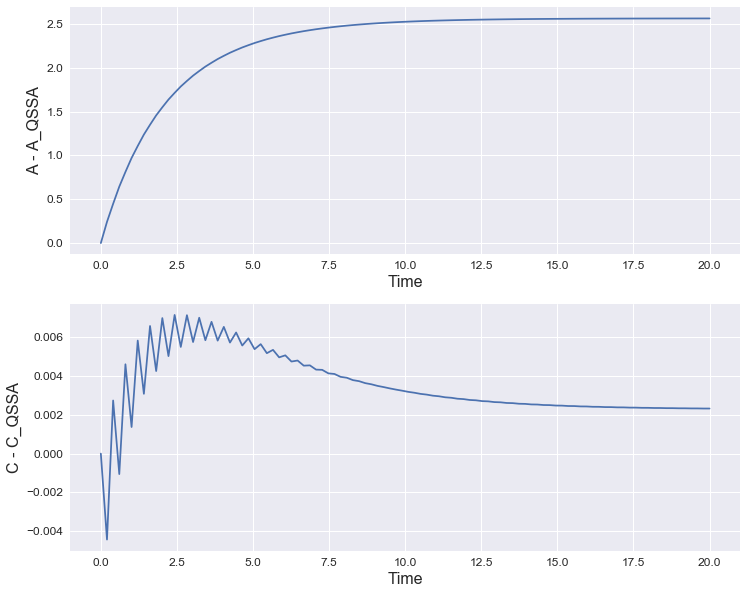

In [11]:
fig, ax = plt.subplots(2,1,figsize=(12, 10))
ax[0].plot(time, Y[:,0] - A_QSSA)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('A - A_QSSA')

ax[1].plot(time, Y[:,2] - C_QSSA)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('C - C_QSSA')
plt.show()